# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío guiado - Árboles de regresión </font>
## <center> _Algoritmo de ensanmble (Parte 1)_ 
    
### <center><b> Bárbara Pérez </b><center>
    

____________

## <font color='MediumSeaGreen'>Requerimientos</font>

- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.


- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable <span style='background:gainsboro'><font color='dimgray'>Sale_Price</font></span>.

______

## <font color='MediumSeaGreen'>Ejercicio 1: Preparación del ambiente de trabajo</font>

- Importe las librerías clásicas a utilizar.

- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase <span style='background:gainsboro'><font color='dimgray'>DecisionTreeRegressor</font></span>.

- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.

- Elimine la columna 'Unnamed: 0' cuando cargue los datos

In [1]:
#librerías clásicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

#librería para pre procesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#librerias para modelamiento
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#librerías para las métricas
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
from matplotlib.gridspec import GridSpec
sns.set_style("darkgrid")
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (16, 20)

In [2]:
#importamos las funciones del expositor de curso
import lec7_graphs as afx

In [3]:
#importamos la base de datos
df = pd.read_csv('ames_housing.csv')

In [4]:
#revisamos el df
df.head()

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [5]:
df.columns

Index(['Unnamed: 0', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'First_Flr_SF',
       'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish',
   

In [6]:
#eliminamos la columna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.shape

(2930, 81)

________

## <font color='MediumSeaGreen'>Ejercicio 2: Feature engineering</font>

- Identifique si el <span style='background:gainsboro'><font color='dimgray'>dtype</font></span> de cada <span style='background:gainsboro'><font color='dimgray'>pd.Serie</font></span> en nuestra base de datos se considera <span style='background:gainsboro'><font color='Maroon'>'object'</font></span> o no. Para todas las variables que sean <span style='background:gainsboro'><font color='Maroon'>'object'</font></span>, realice lo siguiente:

    - Genere una recodificación 𝑘 − 1 en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función con la opción <span style='background:gainsboro'><font color='dimgray'>drop_first</font></span> para ello.
    
    - Utilizando el método <span style='background:gainsboro'><font color='dimgray'>pd.concat</font></span>, concatene a los atributos creados en la base de datos.
    
***Tip***: *No se olvide de eliminar los atributos recodificados, de esta forma evitará un
aumento artificial del desempeño del modelo*.

In [8]:
#revisamos los tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [9]:
df['MS_SubClass'].value_counts()

One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Two_and_Half_Story_All_Ages                    23
One_and_Half_Story_Unfinished_All_Ages         18
PUD_Multilevel_Split_Level_Foyer               17
One_Story_with_Finished_Attic_All_Ages          6
One_and_Half_Story_PUD_All_Ages                 1
Name: MS_SubClass, dtype: int64

In [10]:
#creamos una función que binariza variables categóricas
def binarizador (df):

    #declaramos un df vacio a utilizar 
    df_binarizado = pd.DataFrame()

    #obtenemos una lista de las variables categóricas
    variables_categoricas = list(df.select_dtypes(object).columns)

    #binarizamos las variables categóricas        
    df_binarizado=pd.get_dummies(data=df, columns=variables_categoricas, drop_first=True, dtype='int64')

    #reemplazamos el caracter '-' por '_' en los nombres de las variables
    #para evitar problemas futuros en el modelamiento
    df_binarizado=df_binarizado.rename(columns=lambda x: x.replace("-","_"))

    return df_binarizado

In [11]:
#binarizamos las columnas categóricas
df_binarizado = binarizador(df)

In [12]:
#revisamos las columnas del nuevo df
df_binarizado.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF',
       ...
       'Sale_Type_ConLw', 'Sale_Type_New', 'Sale_Type_Oth', 'Sale_Type_VWD',
       'Sale_Type_WD ', 'Sale_Condition_AdjLand', 'Sale_Condition_Alloca',
       'Sale_Condition_Family', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=307)

In [13]:
#revisamos las columnas del nuevo df
df_binarizado.sample()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
1487,75,9825,1966,1966,0,6,0,483,1092,1092,...,0,0,0,0,0,0,0,0,0,0


_________________

## <font color='MediumSeaGreen'>Ejercicio 3: Primer modelo</font>

- Genere muestras de entrenamiento y validación con <span style='background:gainsboro'><font color='Maroon'>'Sale_Price'</font></span> como vector objetivo y los atributos de la base de datos como matriz.


- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.


- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiper parámetros. Reporte las principales métricas de desempeño

- Comente sobre el desempeño.

In [14]:
#separamos la data para entrenamiento y validación
X = df_binarizado.drop(columns='Sale_Price')
y = df_binarizado['Sale_Price'] # asignamos como target la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2704)

In [15]:
RegressorTree = DecisionTreeRegressor()

In [16]:
#entrenamos el modelo
RegressorTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
#creamos una función para las métricas en base a las predicciones
#sobre los conjuntos de validación
def metricas(modelo, X_test, y_test):
    print("Test MSE:", mean_squared_error(y_test, modelo.predict(X_test)).round(5))
    print("Test MAE:", median_absolute_error(y_test, modelo.predict(X_test)).round(5))
    print("Test R2:", r2_score(y_test, modelo.predict(X_test)).round(5))

In [18]:
#reportamos las métricas
metricas(RegressorTree, X_test, y_test)

Test MSE: 1701630277.34698
Test MAE: 15100.0
Test R2: 0.74251


_________

## <font color='MediumSeaGreen'>Ejercicio 4: Importancia relativa</font>

- Implemente el método <span style='background:gainsboro'><font color='dimgray'>plot_importance</font></span> utilizado en la lectura para reportar la importancia relativa de los atributos.


- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de <span style='background:gainsboro'><font color='dimgray'>Sale_Price</font></span>.


- Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

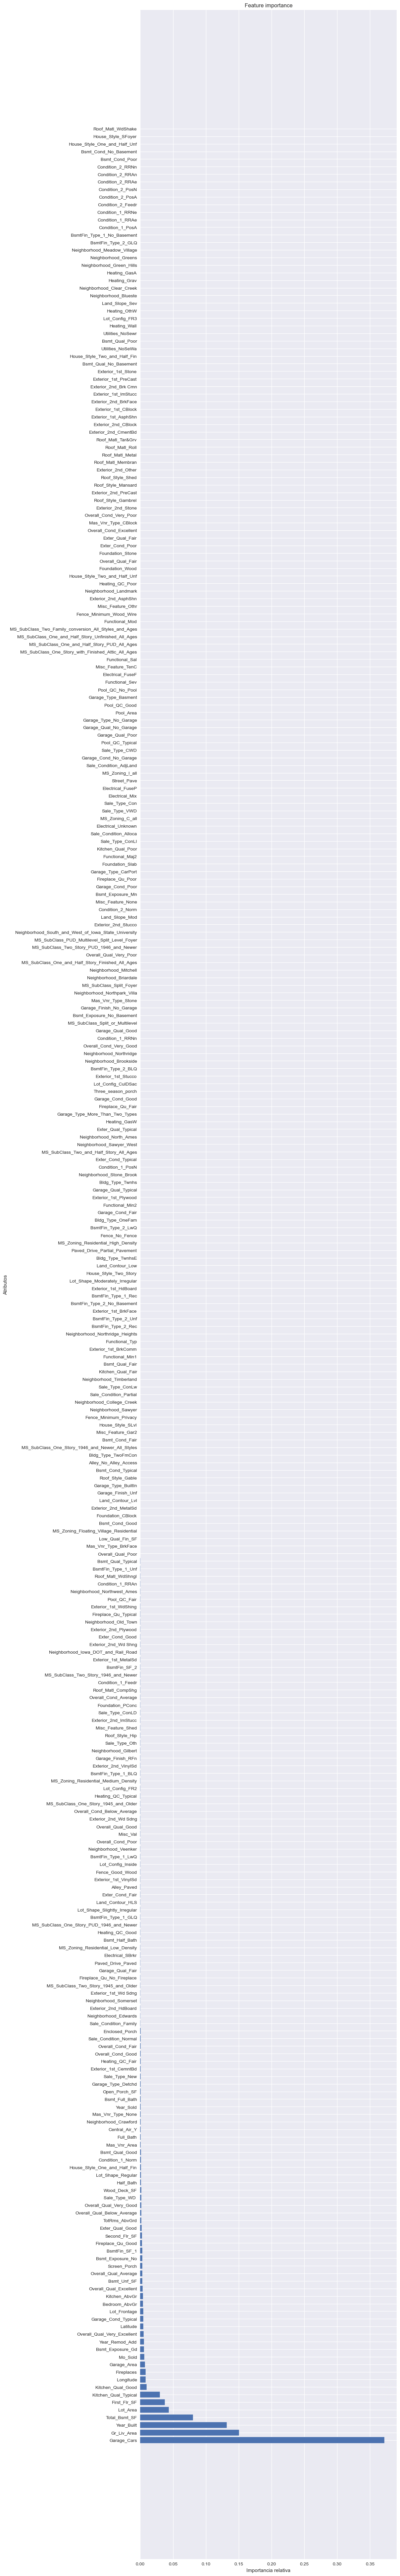

In [19]:
#implementamos la función plot_importance utilizado en la lectura
#para reportar la importancia relativa de los atributos
plt.rcParams['figure.figsize'] = (10, 100)
afx.plot_importance(RegressorTree, X.columns)
plt.xlabel('Importancia relativa');
plt.ylabel('Atributos');
plt.show()

In [20]:
#mostramos los principales 10 atributos que afectan la predicción del vector objetivo
tmp_importance = RegressorTree.feature_importances_
sort_importance = np.argsort(tmp_importance)[::-1]
names = [X.columns[i] for i in sort_importance]
print("Los principales 10 atributos que afectan a 'Sale_Price', de mayor a menor son:\n")         
for i in zip(names[:10], tmp_importance[sort_importance][:10]) :
     print(f"{i[0]}, con {i[1]}\n")   

Los principales 10 atributos que afectan a 'Sale_Price', de mayor a menor son:

Garage_Cars, con 0.3722149877136142

Gr_Liv_Area, con 0.15042695052713573

Year_Built, con 0.13186248037153567

Total_Bsmt_SF, con 0.08042254035822677

Lot_Area, con 0.04371583165953443

First_Flr_SF, con 0.03762539301872696

Kitchen_Qual_Typical, con 0.030136431450475978

Kitchen_Qual_Good, con 0.009733773204199459

Longitude, con 0.008318884419057088

Fireplaces, con 0.00831157664251136



Los principales atributos con con mayor significancia:

1. Garage_Cars

2. Gr_Liv_Area

3. Year_Built

4. Total_Bsmt_SF

5. Lot_Area

6. First_Flr_SF

7. Kitchen_Qual_Typical
 
8. Second_Flr_SF

9. Kitchen_Qual_Good

10. Fireplaces

Existe una distancia de 0.22 entre Garage_Cars (el primero) y Gr_Liv_Area (el segundo)

In [21]:
#separamos los 10 atributos en un nuevo df
df_mejores_atributos = df_binarizado.loc[:,['Sale_Price'] + names[:10]]

In [22]:
#visualimos el df resultante
df_mejores_atributos.head()

,Sale_Price,Garage_Cars,Gr_Liv_Area,Year_Built,Total_Bsmt_SF,Lot_Area,First_Flr_SF,Kitchen_Qual_Typical,Kitchen_Qual_Good,Longitude,Fireplaces
0,215000,2,1656,1960,1080,31770,1656,1,0,-93.619754,2
1,105000,1,896,1961,882,11622,896,1,0,-93.619756,0
2,172000,1,1329,1958,1329,14267,1329,0,1,-93.619387,0
3,244000,2,2110,1968,2110,11160,2110,0,0,-93.617320,2
4,189900,2,1629,1997,928,13830,928,1,0,-93.638933,1


In [23]:
df_mejores_atributos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sale_Price            2930 non-null   int64  
 1   Garage_Cars           2930 non-null   int64  
 2   Gr_Liv_Area           2930 non-null   int64  
 3   Year_Built            2930 non-null   int64  
 4   Total_Bsmt_SF         2930 non-null   int64  
 5   Lot_Area              2930 non-null   int64  
 6   First_Flr_SF          2930 non-null   int64  
 7   Kitchen_Qual_Typical  2930 non-null   int64  
 8   Kitchen_Qual_Good     2930 non-null   int64  
 9   Longitude             2930 non-null   float64
 10  Fireplaces            2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


_________

## <font color='MediumSeaGreen'>Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies</font>

- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.


- **Dentro de los datos de entrenamiento** genere una búsqueda de grilla con GridSearchCV utilizando los siguientes hiper parámetros:

    - **Máximo de atributos**: Evalúe todos los posibles atributos.
    - **Máximo de profundidad**: Entre 1 a 32.
    - **Validaciones cruzadas**: 5.
    
- Reporte la mejor combinación de hiper parámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

## <font color='Gray'> Pickling </font>

- Ahora generamos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo <span style='background:gainsboro'><font color='dimgray'>pickle</font></span>.


- <span style='background:gainsboro'><font color='dimgray'>pickle</font></span> contiene la función dump, que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

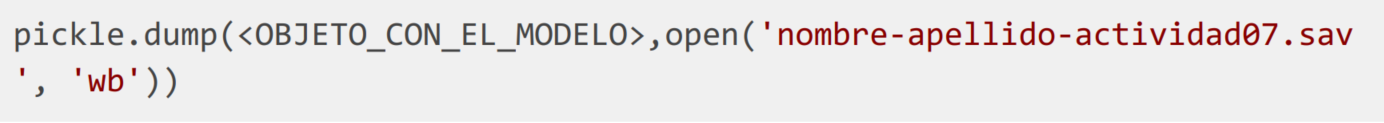

- Envíe su modelo y conjuntos de entrenamiento a un compañero

__________________

In [24]:
#generamos nuevos conjuntos de entrenamiento y validación
X_ma = df_mejores_atributos.drop(columns='Sale_Price')
y_ma = df_mejores_atributos['Sale_Price'] # asignamos como target la variable objetivo
X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(
    X_ma, y_ma, test_size = 0.3, random_state = 1234)

In [25]:
X_train_ma.shape[1]

10

In [26]:
RegressorTree

DecisionTreeRegressor()

In [27]:
RegressorTree2= RegressorTree

In [28]:
#creamos un diccionario con los hiperparámetros del desafío
params = {'max_features': list(range(1,X_train_ma.shape[1]+1)),
          'max_depth': np.linspace(1, 32, 32, dtype=int)
         }

In [29]:
#instanciamos una GridSearch en base al modelo y los hiperparámetros
#y lo entrenamos con los nuevos conjuntos de entrenamiento
gs = GridSearchCV(RegressorTree, params, cv=5).fit(X_train_ma, y_train_ma)

In [30]:
#reportamos el mejor estimador
gs.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features=5)

In [31]:
#reportamos los mejores hiperparámetros
gs.best_params_

{'max_depth': 7, 'max_features': 5}

In [32]:
#reportamos las métricas del modelo depurado
metricas(gs, X_test_ma, y_test_ma)

Test MSE: 1597636422.15601
Test MAE: 16182.52778
Test R2: 0.74599


In [33]:
#reportamos las métricas del modelo anterior
metricas(RegressorTree, X_test, y_test)

Test MSE: 1701630277.34698
Test MAE: 15100.0
Test R2: 0.74251


In [34]:
#importamos pickle y mostramos su versión
import pickle
pickle.format_version

'4.0'

In [35]:
#creamos exportamos el modelo y los conjuntos de entrenamiento y validación
#mediante pickle
pickle.dump(gs, open('barbara_perez_desafio_evaluado_arboles_de_regresion.sav','wb'))
pickle.dump(X_train_ma, open('barbara_perez_desafio_evaluado_arboles_de_regresion_X_train.sav','wb'))
pickle.dump(y_train_ma, open('barbara_perez_desafio_evaluado_arboles_de_regresion_y_train.sav','wb'))
pickle.dump(X_test_ma, open('barbara_perez_desafio_evaluado_arboles_de_regresion_X_test.sav','wb'))
pickle.dump(y_test_ma, open('barbara_perez_desafio_evaluado_arboles_de_regresion_y_test.sav','wb'))

______________